<img src="https://user-images.githubusercontent.com/92790663/185799571-3d6e98c8-00fd-4b5e-a50b-6f20f892d9f3.jpg" alt="image" width="1500"/>  

## Business Problem  
Historically, gold had been used as a form of currency in various parts of the world including the USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. Recently, emerging world economies, such as China, Russia, and India have been big buyers of gold, whereas the USA, SoUSA, South Africa, and Australia are among the big seller of gold.

Fractional change in gold price may result in huge profit or loss for investors as well as government banks.
Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity. But Gold prices are dependent on many factors such as prices of other precious metals, prices of crude oil, stock exchange performance, Bonds prices, currency exchange rates, etc.


#### Business Objectives and Constraints
* To accurately predict the future adjusted closing price of Gold ETF (Exchang Traded Funds) across a given period of time in the future.
* The model should not take too long to return prediction (Latency concerns).
* To Maximize the Coefficient of determination ($R^2$) as much as posible (the closer it is to 1, the better).
* To minimize the Root Mean Squared Error (RMSE) as much as posible (the closer it is to zero the better).

#### Type of Machine Learning Problem
It is a Regression problem as the target variable (adjusted closing price) is a **continuous** value.

####  Performance Metrics

- Accuracy.
- R-Squared ($R^2$) score (Coefficient of determination).
- RMSE (root mean squared error).

### Data Overview
- Data Source: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset <br><br>
- Data for this study is collected from November 18th 2011 to January 1st 2019 from various sources.<br><br>
- The dataset has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.<br><br>
- The historical data of Gold ETF fetched from Yahoo finance has 7 columns, Date, Open, High, Low, Close, Adjusted Close, and Volume, the difference between Adjusted Close and Close is that the closing price of a stock is the price of that stock at the close of the trading day. Whereas the adjusted closing price takes into account factors such as dividends, stock splits, and new stock offerings to determine a value. So, Adjusted Close is the outcome variable which is the value you have to predict.

#### Attributes:

#### Features

- Gold ETF :- Date, Open, High, Low, Close and Volume.
- S&P 500 Index :- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume'
- Dow Jones Index :- 'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume'
- Eldorado Gold Corporation (EGO) :- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'
- EURO - USD Exchange Rate :- 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend'
- Brent Crude Oil Futures :- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'
- Crude Oil WTI USD :- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'
- Silver Futures :- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'
- US Bond Rate (10 years) :- 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend'
- Platinum Price :- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend'
- Palladium Price :- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend'
- Rhodium Prices :- 'RHO_PRICE'
- US Dollar Index : 'USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend'
- Gold Miners ETF :- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume'
- Oil ETF USO :- 'USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'

#### Target Variable

Gold ETF :- Adjusted Close

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#sklearn models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

#statsmodels 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA

import joblib
import warnings
warnings.filterwarnings("ignore")

# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

sns.set(context="notebook", palette="coolwarm", style = 'ticks', font_scale = 1.2, color_codes=True)

### Assesing Data

In [2]:
# Read data.
data = pd.read_csv('.\dataset\FINAL_USO.csv')
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200


In [3]:
# Print all columns.
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [4]:
# Descriptive information on features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

#### Observation:
- No missing values
- The `Date` feature is of type `object`.

In [5]:
# check for any missing values.
data.isnull().values.any()

False

In [6]:
# Check for duplicates on each row.
data.duplicated().value_counts()

False    1718
dtype: int64

In [7]:
# Check for unique values.
data.nunique()

Date             1718
Open             1363
High             1368
Low              1356
Close            1384
                 ... 
USO_High         1102
USO_Low          1124
USO_Close        1128
USO_Adj Close    1128
USO_Volume       1716
Length: 81, dtype: int64

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


#### Observation
Looks like **Close** and **Adj Close** are duplicates of each other, lets take a closer look.

In [9]:
# View both features "Close" and "Adj Close".
data[['Close', 'Adj Close']].head()

,Close,Adj Close
0,152.330002,152.330002
1,155.229996,155.229996
2,154.869995,154.869995
3,156.979996,156.979996
4,157.160004,157.160004


In [10]:
# Check to see if features "Close" and "Adj Close" are exact duplicates of each other.
(data.Close.values == data['Adj Close'].values).all()

True

It is now clear that `Close` and `Adj Close` are duplicates of each other as shown above, hence the need to drop one (`Close`)

#### Data Quality
Data quality issues are mostly divided into four:
- Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect.
- Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

After assessing the data, we have the following issues:

1. Erroneous data type (`Date`) which is a Validity issue.
2. Duplicate features (`Close` and `Adj Close`) which is a Consistency issue.

#### Data Tidiness
There are three main requirements for tidiness.

1. Each variable forms a column,
2. Each observation forms a row, and
3. Each type of observational unit forms a table.

These three criteria's are fairly met by our dataset.

### Cleaning Data

In [11]:
# Make a copy of the original piece of data.
data_clean = data.copy()

### Quality issues

### Issue #1:
- Erroneous data type (`Date`)

#### Define
- Convert feature to its appropriate data types.

#### Code

In [12]:
# Convert the datatype of "Date" feature from "object" to "datetime".
data_clean.Date = pd.to_datetime(data_clean.Date, format="%Y-%m-%d")

#### Test

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1718 non-null   datetime64[ns]
 1   Open           1718 non-null   float64       
 2   High           1718 non-null   float64       
 3   Low            1718 non-null   float64       
 4   Close          1718 non-null   float64       
 5   Adj Close      1718 non-null   float64       
 6   Volume         1718 non-null   int64         
 7   SP_open        1718 non-null   float64       
 8   SP_high        1718 non-null   float64       
 9   SP_low         1718 non-null   float64       
 10  SP_close       1718 non-null   float64       
 11  SP_Ajclose     1718 non-null   float64       
 12  SP_volume      1718 non-null   int64         
 13  DJ_open        1718 non-null   float64       
 14  DJ_high        1718 non-null   float64       
 15  DJ_low         1718 n

### Issue #2:
- Duplicate features (`Close` and `Adj Close`)

#### Define
- Drop one of the features, `Close` in this case.

#### Code

In [14]:
# Drop the "Close" feature, since it's a duplicate of "Adj Close".
data_clean.drop('Close', axis=1, inplace=True)

#### Test

In [15]:
data_clean.columns

Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_

In [16]:
# Conditional statement to test.
if 'Close' not in data_clean.columns:
    print('Test passed')
else:
    print('Test failed')

Test passed


### Exploratory data Analysis

#### Transforming the dataframe into a time series by setting the "Date" feature to index.

In [17]:
# Transform dataframe into a time series by turning the "Date" feature into index
data_clean.set_index('Date', inplace=True)

In [18]:
# Descriptive statistics on the target variable.
adj_close = data_clean['Adj Close']
adj_close.describe()

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Adj Close, dtype: float64

#### Observation
The **mean** and **50th percentile** values are not too far from each other, which indicates that there might be litle to no outliers in the dataset.

### Bivariate Exploration

#### Question 1

What is the distribution / trend of gold price over time?

#### Visualization

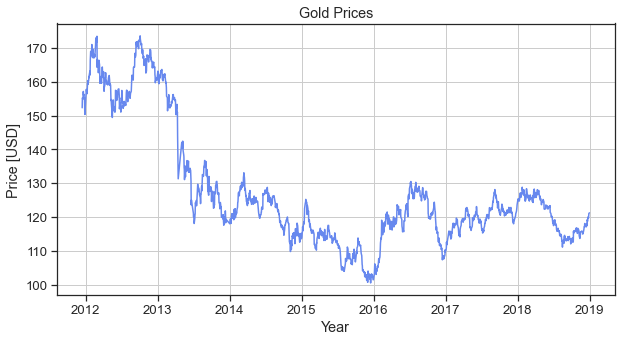

In [19]:
# Data['Adj Close'].plot()
plt.figure(figsize=(10,5))
plt.plot(adj_close)
plt.xlabel('Year')
plt.ylabel('Price [USD]')
plt.title('Gold Prices')
plt.grid()
plt.show()

### Observation
- There is an overall downward trend.
- Here we can clearly see that gold prices are very high in the time period of 2012 to 2013. And since then, there has been a general decline in the price till 2016, then a little rise between 2016 and late 2018 with some fluctuations in between.

#### Zooming in to the last 3 years of data.
Let's have a closer look at the trend for the last 3 years.

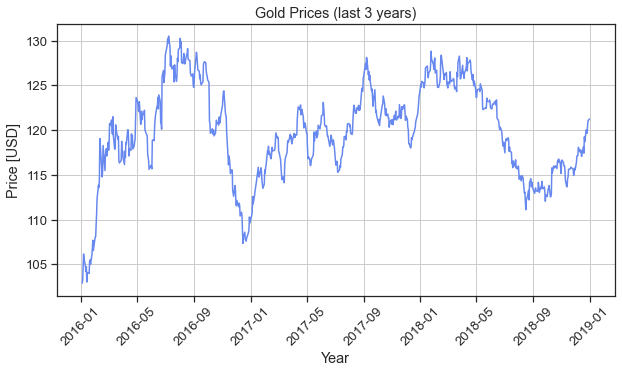

In [20]:
last_3_years = adj_close.loc[adj_close.index>='2016-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_3_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices (last 3 years)')
plt.grid()
plt.show()

#### Zooming in closer to the last 2 years of data:
Let's have a closer look at the trend for the last 2 years, we may be able to see things clearly.

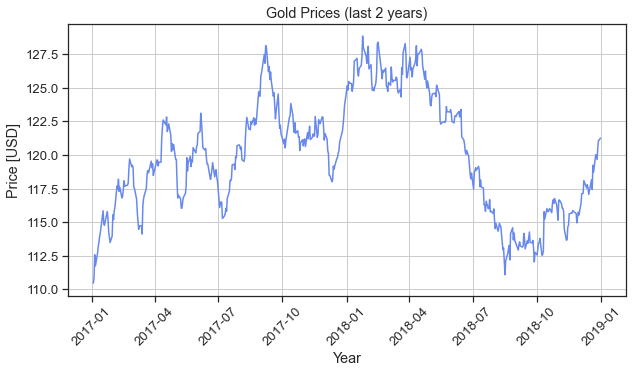

In [21]:
last_2_years = adj_close.loc[adj_close.index>='2017-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_2_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices (last 2 years)')
plt.grid()
plt.show()

#### Observation
As we zoom closer, we observed that there exist some level of seasonality (not too clear) in the Gold Prices and some seasonality are higher than others, hence the need to transform the series into a stationary data by subtracting the previous seasonality from the current seasonality.

#### Zooming in even closer to just last one year of data:

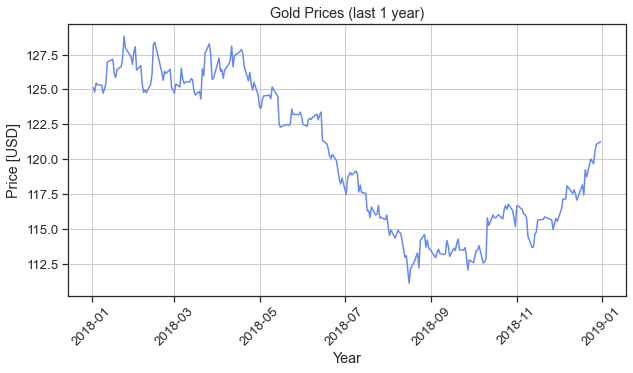

In [22]:
last_1_years = adj_close.loc[adj_close.index>='2018-01-01']
plt.figure(figsize=(10,5))
plt.plot(last_1_years)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Price [USD]')
plt.title('Gold Prices (last 1 year)')
plt.grid()
plt.show()

#### Observation
Looking at the graph above, it can be seen that the first quarter (Jan to Apr) of 2018 recorded the highest and steady price of Gold for the year, after which there was a steady decline up till mid August, then increases a little and remain almost steady till around mid September before it then started recording a almost steady increace till the end of the year (2018). But on a high level note, 2018 recorded a general decreasing trend in Gold Price.

#### Question 2

Investigate the autocorrelation of the time series.

#### AutoCorrelation:
Autocorrelation refers to the degree of correlation of the same variables between two successive time intervals. It measures how the lagged version of the value of a variable is related to the current version of it in a time series.
If a series show a positive autocorrelation then we say the series is **momentum** (trend following) and if the series shows a negative autocorrelation then we say the series is **mean reversing**. (Mean reversion is a financial term for the assumption that an asset's price will tend to converge to the average price over time, read more about **Mean reversion** [here](https://en.wikipedia.org/wiki/Mean_reversion_(finance)))
In python we can use pandas autocorr() function to calculate autocorrelation of a series.

In [23]:
# Calculating the Autocorrelation of the "Adj Close" using the python's inbuild "autocorr()" function
print(adj_close.autocorr())

0.9974383274693523


#### Observation
Here the autocorrelation value is positive and high (**0.997438**), hence we can conclude that the series is a trend following series.

#### Question 3

Investigate the percentage change of gold price over time in the time series.

#### Percentage Change
Lets use the pct_change() function available in pandas to see how the prices of Gold changes over a time lag in days.
This is useful in comparing the percentage of change in a time series of elements.
This function by default calculates the percentage change from the immediately previous row. It output first row as NaN so we have to apply dropna(). Here we test percent change in gold price to check that series is a random walk or not.

#### Hypothesis testing
- Null hypothesis ($H0$): Percent change in gold prices over a period follow random walk. <br>
- Alternative hypothesis ($H1$): Percent change in gold prices over a period does not follow a random walk.

In [24]:
# Using the "adfuller" function available in statesmodels to perform the test
time_period = 20
results = adfuller(data_clean['Adj Close'].pct_change(periods=time_period).dropna())
print(f'The p-value of the test on prices fot the last {time_period} days is: {round(results[1], 6)}')

The p-value of the test on prices fot the last 20 days is: 1.5e-05


#### Observation on the percentage change
The p-value of the test is less than 5% (0.000015), i.e. the percentage change of any current price to that of 20 days ago is less than 5%, which is a strong indication that the price of Gold at any given time $\tau$ is not a random walk but a function of trend, thus, **we reject the H0**. <br>
As a result, we may want to experiment by trying to predict the Gold price using just the trend information (with the help of **Autoregressive models**), then compare the result with the prediction that takes into account other features.

#### Question 4
Is the series stationary?   
Lets see with the help of rolling mean and standard deviation!

#### Visualization

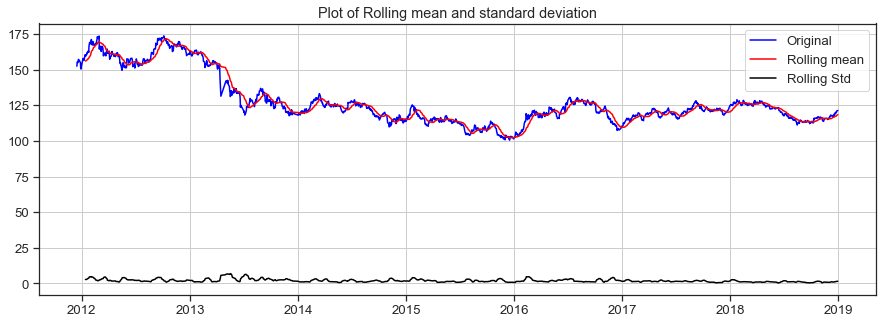

In [25]:
#Calculating rolling statistics
rolling_mean = adj_close.rolling(window=20).mean()
rolling_std = adj_close.rolling(window=20).std()

#setting the figure size
plt.figure(figsize=(15,5))
fig = plt.figure(1)

#plot rolling statistics
original = plt.plot(adj_close, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='r', label='Rolling mean')
std = plt.plot(rolling_std, color='k', label='Rolling Std')
plt.title("Plot of Rolling mean and standard deviation")
plt.legend()
plt.grid()
plt.show()

#### Observation
- Standard Deviation is constand over the time
- Mean is not constant over time (it follows the general trend of the series) <br>
For a series to be considared stationary, the mean and standard deviation should be constand over time, but that is not the case here, hence we conclude that the series is not a stationary one.

#### Question 5

Investigate the components of the time series with respect to deviations in trends, seasonality and residuals.

#### Visualization

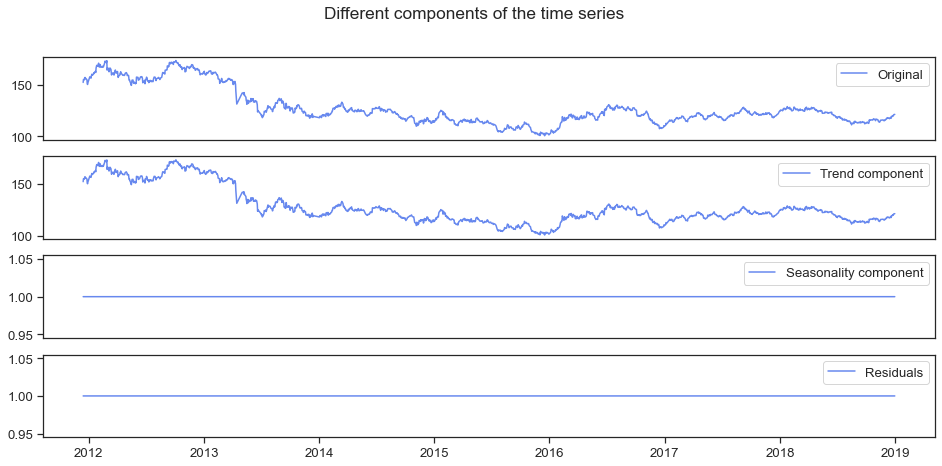

In [26]:
# Decomposing the series into its three components namely "Trend", "Seasonality" and "Residuals"
decomposed = seasonal_decompose(adj_close, period=1, model='multiplicative')
trend = decomposed.trend
seasonal = decomposed.seasonal
residuals = decomposed.resid

# Plotting the different components as well as the original series to see how each component is contributing to the series
plt.figure(figsize=(16,7))
fig = plt.figure(1)
fig.suptitle('Different components of the time series')

plt.subplot(411)
plt.plot(adj_close, label='Original')
plt.xticks([])
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend component')
plt.xticks([])
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonality component')
plt.xticks([])
plt.legend()

plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend()
plt.show()

#### Observation
It is very evident from the above plot that the trend component is contributing more to the original time series.

#### Question 6

Investigate the correlation of other features to the target variable (`Adj Close`).

In [27]:
# Check the correlation between other features and the target variable.
corr_data = data_clean.corr()
corr_data.abs()['Adj Close'].sort_values(ascending=False)

Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
GDX_Low       0.975561
                ...   
PLD_Trend     0.026536
USB_Trend     0.025933
EU_Trend      0.019913
USDI_Trend    0.016641
PLT_Trend     0.011355
Name: Adj Close, Length: 79, dtype: float64

#### Visualization

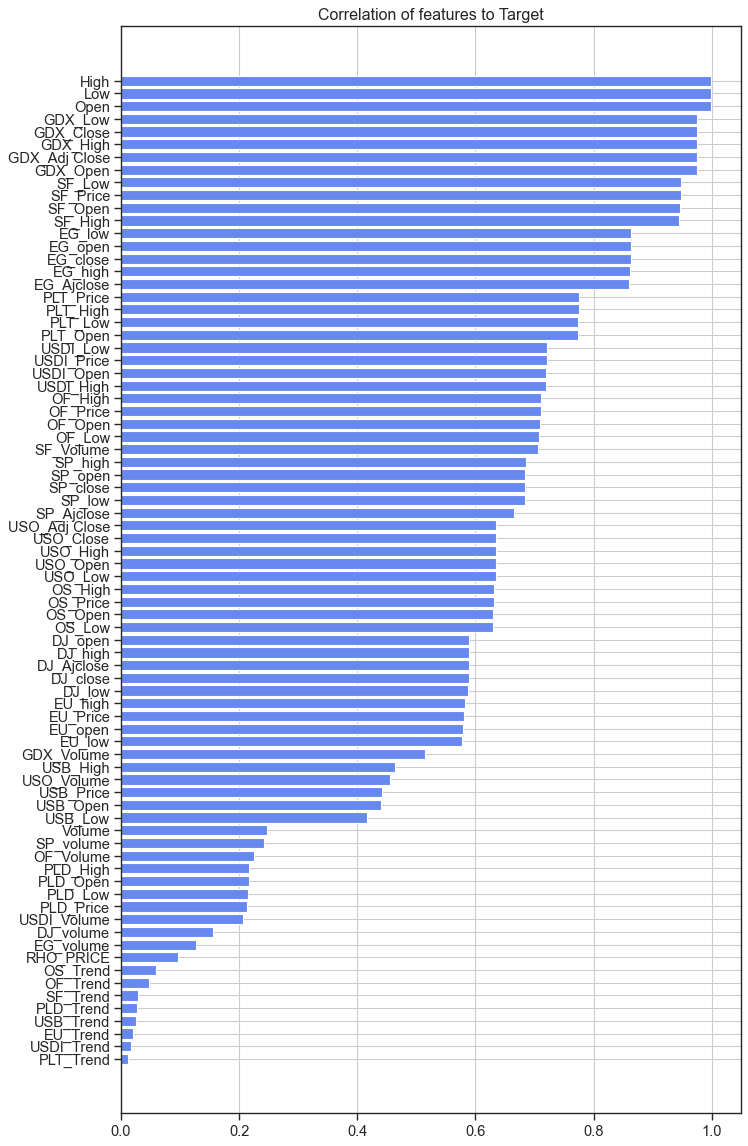

In [28]:
def plot_corr_scores(corr_data, target):
    """
    Displays the horizontal bar plot showing how features are correlated with the target variable
    corr_data: The DataFrame containing the correlation scores between all the features
    target: The dependent variable whoes value you aim to predict
    """
    scores = corr_data.abs()[target].drop(target)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Correlation of features to Target")
    plt.grid()
    
plt.figure(dpi=80, figsize=(10,18))
plot_corr_scores(corr_data, 'Adj Close')

#### Observation

We can clearly see the degree of correlation of the features with the target variable `Adj Close` with the `High` feature recording the highest correlation value.

### Splitting the data into Train and Test sets
Since it is a time series data, it will be splited on the time axis in order to avoid data leakage.

In [29]:
# Seperating the features from the target
features_data = data_clean.drop('Adj Close', axis=1)
target = data_clean['Adj Close']

# Splitting the data into train and test, 70% for train and 30% for test.
X_train, X_test, y_train, y_test = train_test_split(features_data, target, test_size=0.3, shuffle=False)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1202
516
1202
516


#### Further Splitting the Train data into training and cross validation 

In [30]:
# Splitting the train set into train and cross validation, 80% of 70% for Train and 20% of 70% for cross validation.
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=.2, shuffle=False)

print(len(X_train))
print(len(X_cv))
print(len(y_train))
print(len(y_cv))

961
241
961
241


## Feature Selection

#### Using the Variance Inflation Factor (VIF) method to check and remove Multicollinearity

The VIF directly measures the ratio of the variance of the entire model to the variance of a model with only the feature in question. Simply put, it gauges how much a feature’s inclusion contributes to the overall variance of the coefficients of the features in the model.

A VIF of 1 indicates that the feature has no correlation with any of the other features. It is given by the equation below:

$$ VIF_i = \frac{1}{1-R_i^2} $$

Where $R_i^2$ represents the unadjusted coefficient of determination for regressing the $i^{th}$ independent variable on the remaining ones. The reciprocal of VIF is known as tolerance. Either VIF or tolerance can be used to detect multicollinearity, depending on personal preference.

If $R_i^2$ is equal to 0 (implies VIF = 1), the variance of the remaining independent variables cannot be predicted from the $i^{th}$ independent variable. Therefore, the $i^{th}$ independent variable is not correlated to the remaining ones, which means multicollinearity does not exist. In this case, the variance of the $i^{th}$ regression coefficient is not inflated.  

Statsmodels provides us with a function called `variance_inflation_factor` for the computation, we utilized it.

In [31]:
# Utility function to return the VIF value for each feature provided
def compute_vif(features, df):
    """
    Returns a DataFrame containing features and their corresponding variance inflation factor
    features: list of features whoes multicollinearity check is needed
    df: DataFrame of the data under review
    """
    X = df[features]   
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['Vif Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Feature']!='intercept']
    return vif

In [32]:
def select_features(train_df, threshold):
    """
    Returns two objects;
    1. a DataFrame containing features and their corresponding variance inflation factor, and
    2. Pandas Index object containing the list of features that have the least Multicollinearity in accordance with
       the supplied threshold.
    train_df: The training dataset whoes Multicollinearity is to be checked
    threshold: value to compare VIF value with, above which, the feature droped
    """
    data = train_df.copy()
    flag = True
    while flag:
        features_to_consider = data.columns
        #calling the "compute_vif" utility function the Variance Inflation Factor dataframe
        sorted_vif_df = (compute_vif(features_to_consider, data) 
                         .sort_values('Vif Factor', ascending=False).reset_index().drop('index', axis=1))

        # get the highest vif value to compare against a threshold
        highest_vif = sorted_vif_df.at[0, 'Vif Factor']
        
        #compare the highest_vif with a threshold (100 was decided for this problem by the team)
        if highest_vif >= threshold: #or highest_vif=='inf':
            # select the feature corresponding to the highest_vif (index 0 for both)
            feature = sorted_vif_df.at[0, 'Feature'] 
            #drop the feature
            data.drop(feature, axis=1, inplace=True) 
            
        else:
            flag = False
    return sorted_vif_df, data.columns

In [33]:
# Selecting the top n correlated features with the target
high_feat = corr_data.abs()['Adj Close'].sort_values(ascending=False).drop('Adj Close').head(30).index
#X_train = X_train[high_feat] #filter the train dataset to contain only the top n features

# call the "select_features" function to return the VIF datafram and the selected features
vif_df, selected_features = select_features(X_train[high_feat], 100)

#### Display the VIF dataframe and the selected features (sanitary check)

In [34]:
# Display the Selected features
display(vif_df)
print(selected_features)

,Feature,Vif Factor
0,GDX_Adj Close,66.163318
1,Low,61.385271
2,EG_open,31.305776
3,OF_Price,20.206543
4,SF_Open,17.148546
5,USDI_Open,15.971430
6,PLT_Open,15.380821
7,SF_Volume,2.006295


Index(['Low', 'GDX_Adj Close', 'SF_Open', 'EG_open', 'PLT_Open', 'USDI_Open',
       'OF_Price', 'SF_Volume'],
      dtype='object')


Our function selected 8 features out of the initial 78 as shown above.  
We will use these features to train our models, if we aren't satisfied with the result then we shall consider explore other methods of feature selection

#### Making a dataframe of highly correlated features and with least multicollinearity

In [35]:
# make a dataframe of the selected features
X_train = X_train[selected_features]
X_train.head()

,Low,GDX_Adj Close,SF_Open,EG_open,PLT_Open,USDI_Open,OF_Price,SF_Volume
Date,,,,,,,,
2011-12-15,151.710007,48.973877,54248,74.550003,1420.30,80.565,105.09,119440
2011-12-16,153.899994,49.921513,53650,73.599998,1414.75,80.175,103.35,65390
2011-12-19,154.360001,48.490578,53400,69.099998,1422.65,80.300,103.64,67280
2011-12-20,156.580002,50.215282,52795,66.449997,1408.95,80.890,106.73,55130
2011-12-21,156.130005,50.186852,53519,67.099998,1434.40,80.105,107.71,75950


### Normalization and Standardization.

**Note:** Only the train set will be scaled or normalized to avoid data leakage.

In [36]:
# Normalizing and Standardizing the train data.
min_max_scaler = MinMaxScaler()
stand_scaler = StandardScaler()
min_max_norm_data = min_max_scaler.fit_transform(X_train)
stand_scaler_data = stand_scaler.fit_transform(X_train)

## Modeling

In [37]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (RMSE and R-Squared scores)
    model: Fitted model
    x: cross validation features dataset
    y: cross validation target values
    """
    predicted = model.predict(x) #get predictions
    RSME_score = mean_squared_error(y_true=y, y_pred=predicted, squared=False) #squared=False will RMSE instead of MSE
    R2_score = r2_score(y, predicted)
    
    print('RMSE:', RSME_score)
    print('R-Squared:', R2_score)
    print()

### Using Independent Features to Model the Dependent variable (<font color='green'>Adj Close</font>)

#### Modeling with Different Regressors

In [38]:
import random

In [40]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {'Linear Reg': LinearRegression(), 'DT Regressor': DecisionTreeRegressor(random_state=0),
               'RF Regressor':RandomForestRegressor(random_state=0), 'Lasso': LassoCV(random_state=0), 
               'Ridge Regressor': RidgeCV(), 'BayesianRidge': linear_model.BayesianRidge(),
               'Gradient Boost': GradientBoostingRegressor(random_state=0), 'SGDRegressor': SGDRegressor(random_state=0)
              }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    random.seed(0)
    model.fit(X_train, y_train)
    print(f'Performance of {key} on Validation and Test:')
    print('=='*24)
    print ( 'Validation set:')
    print("**"*8)
    evaluate_model(model,X_cv[selected_features], y_cv)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,X_test[selected_features], y_test)

Performance of Linear Reg on Validation and Test:
Validation set:
****************
RMSE: 0.6266204530683203
R-Squared: 0.9930172358698773

Test set:
****************
RMSE: 0.5047247814889094
R-Squared: 0.9882949443759095

Performance of DT Regressor on Validation and Test:
Validation set:
****************
RMSE: 1.797056855899055
R-Squared: 0.9425695955032982

Test set:
****************
RMSE: 0.7099665138483734
R-Squared: 0.9768399253338955

Performance of RF Regressor on Validation and Test:
Validation set:
****************
RMSE: 0.9710067970643845
R-Squared: 0.9832327137075707

Test set:
****************
RMSE: 0.4484283198219961
R-Squared: 0.9907604613073545

Performance of Lasso on Validation and Test:
Validation set:
****************
RMSE: 4.492464309671609
R-Squared: 0.6410883868315108

Test set:
****************
RMSE: 6.051781881029257
R-Squared: -0.6827932370945125

Performance of Ridge Regressor on Validation and Test:
Validation set:
****************
RMSE: 0.629225810278012
R-S

### Modelling with the Trend Information.

#### Making the time series stationary
- A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.<br>
- If a process is non stationary, then it becomes difficult to model hence we need to make the series at hand a stationary one.

#### Differencing
This is one way to make a non-stationary time series stationary — compute the differences between consecutive observations.

#### Choosing the parameters of the ARIMA (`p`, `d`, `q`) model

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values.

We will look at the Autocorrelation function (ACF) plots and the Partial Autocorrelation funtion (PACF) plots to identify the values of AR and MA components (`p` and `q`) respectively. `d` is the differecing parameter which indicates the order of differencing to make the series stationary, it can be gotten by experimenting.  
Further more, the **Augmented Dickey Fuller** test will be employed to determine the properties of the time series.

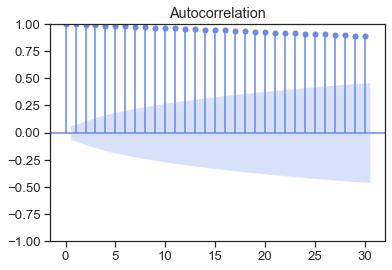

In [39]:
# Ploting the ACF on y_train
plot_acf(y_train.values)
plt.show()

Clearly, the data is not ideal for the ARIMA model to directly start autoregressive training. Differencing may be the solution this problem.  
<b>*Differencing*</b> is one way to make a non-stationary time series stationary — compute the differences between consecutive observations.  
  
  
Differencing is made posible and easy with the help of the `diff()` function available in python.

The next step is computing `p` for the ARIMA model, or the order for the autoregressive model. We can inspect the partial autocorrelation plot, which measures the correlation between the time-series data and a certain lag. Based on the presence or absence of correlation, we can determine whether the lag or order is needed or not.  
  
 Thus, we determine `p` based on the most significant lag in the partial autocorrelation plot. We can check the plot up to 2nd order difference to be sure.

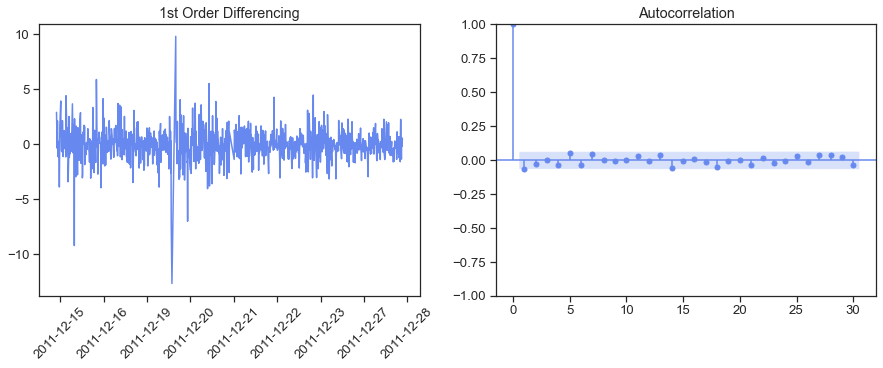

In [40]:
#Visualizing the 1st order Difference and the Autocorrelation side by side
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(y_train.diff())
ax1.set_xticklabels(labels=y_train.index.date, rotation=45)

ax2 = f.add_subplot(122)
plot_acf(y_train.diff().dropna(), ax=ax2)
plt.show()

As seen above, first-order differencing looks good on the autocorrelation plot with `q` values of 1 or 5 (subject to experimentation).  
Though 1st order looks good, 2nd order differencing was also done and the result did not show any difference with the one in this plot, hence it is not shown here.

#### Augmented Dickey-Fuller test (ADF)

A more mathematical test is employed to determine which order is best for the data in question. The Augmented Dickey-Fuller test is one such measure that statsmodel readily provides. The ADF test aims to reject the null hypothesis that the given time-series data is non-stationary. It calculates the p-value and compares it with a significance level of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one, this steps are repeated untill the p-value is less than the threshold value.

In [41]:
#Testing to see if after taking first differencing, the series is stationary or not, (if not then we take 2nd difference)
p_value = adfuller(y_train.values)
print('P-value (0 order diff.): ', p_value[1])

p_value = adfuller(y_train.diff(periods=7).dropna())
print('P-value (1st order diff.): ', p_value[1])

P-value (0 order diff.):  0.834693687306409
P-value (1st order diff.):  3.7702303447476437e-07


The p-value of **$ 3.77 * 10^{-7} $** at order 1 is far less than the threshold value of **0.05** which indicates that the series is indeed stationary after the 1st differencing.  
Thus, we can consider the order of differencing `d` as `1` in the ARIMA model. This corresponds well with the autocorrelation line graph plotted above.

#### Partial Autocorrelation plot

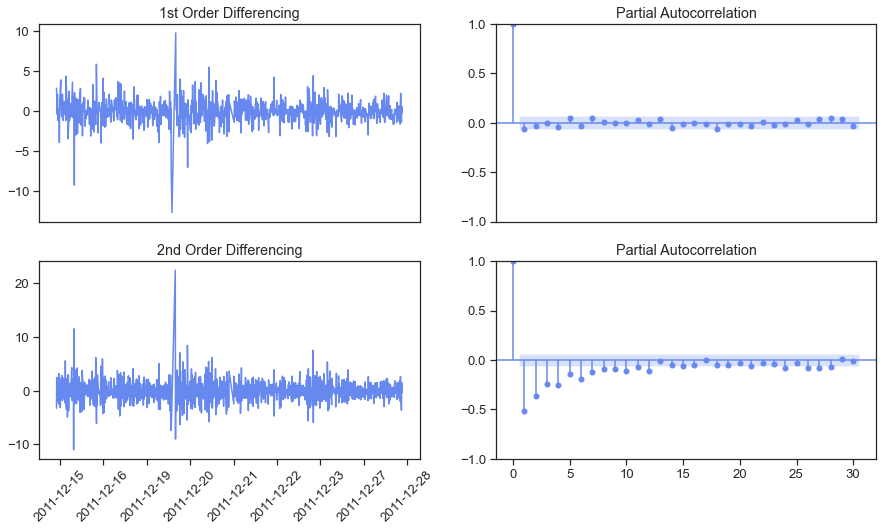

In [42]:
#Visualizing the 1st order Difference and the Autocorrelation side by side
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(221)
ax1.set_title('1st Order Differencing')
ax1.plot(y_train.diff())
ax1.set_xticks(ticks=[]) #to let the 1st column share x ticks
#ax1.set_xticklabels(labels=y_train.index.date, rotation=45,)

ax2 = f.add_subplot(222)
plot_pacf(y_train.diff().dropna(), ax=ax2)
ax2.set_xticks(ticks=[]) #to let the 2nd column share x ticks

ax3 = f.add_subplot(223)
ax3.set_title('2nd Order Differencing')
ax3.plot(y_train.diff().diff())
ax3.set_xticklabels(labels=y_train.index.date, rotation=45)

ax4 = f.add_subplot(224)
plot_pacf(y_train.diff().diff().dropna(), ax=ax4)

# for ax in fig.get_axes():
#     ax.label_outer()
plt.show()

#### Observation
In the plots above, we see that the 1st lag is the most significant. Thus, we consider experimenting with `p` set to 1 or 5.  

**Note:** The Partial Autocorrelation plot corresponding to 2nd order differencing shows that the series is over-differenced as almost all data points are negative.

Finally, “q” is estimated similarly by looking at the ACF plot. Looking at the number of lags crossing the threshold (or at the boundary) line, we can determine how much of the previous points would be significant enough to predict a point in the future. The ones with high correlation contribute more and would be enough to predict future values. 
From the ACF plots above, the moving average (MA) parameter `q` was set to 5 (can be tuned).

Thus, our final ARIMA model can be defined as `ARIMA(p=1, d=1,q= 5)`.

### Fitting the ARIMA model

In [43]:
# Fitting the ARIMA model and printing the summary statistics
model = ARIMA(y_train.values, order=(1,1,5))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  961
Model:                 ARIMA(1, 1, 5)   Log Likelihood               -1718.034
Date:                Tue, 23 Aug 2022   AIC                           3450.069
Time:                        13:27:54   BIC                           3484.137
Sample:                             0   HQIC                          3463.043
                                - 961                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7888      0.154     -5.111      0.000      -1.091      -0.486
ma.L1          0.7256      0.155      4.676      0.000       0.421       1.030
ma.L2         -0.0868      0.027     -3.188      0.0

Test RMSE: 1.266
Cross validation R-Squared: 0.971
Total time taken: 139.836 Seconds


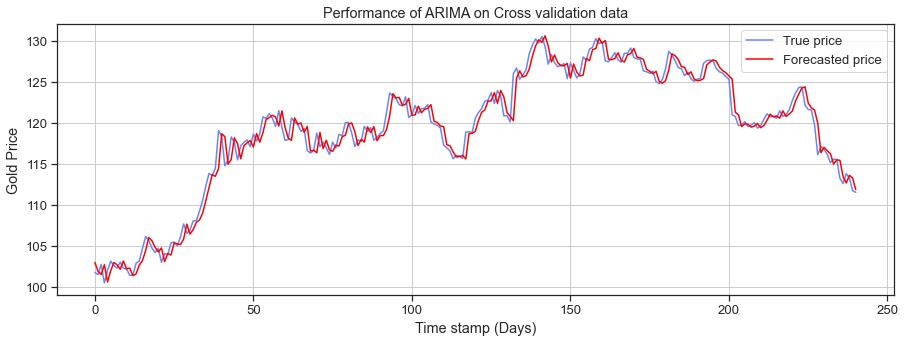

In [44]:
# Putting the datapoints in a list.
history = [x for x in y_train] 

predictions = list()

start_time = time()

# Walk-forward validation.
for t in range(len(y_cv)):
    model = ARIMA(history, order=(1,1,5))
    model = model.fit()
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = y_cv[t]
    history.append(obs)
    del history[0]

end_time = time()

# Evaluate forecasts.
rmse = mean_squared_error(y_cv, predictions,squared=False)
r_square = r2_score(y_true=y_cv, y_pred=predictions)
print('Cross validation RMSE: %.3f' % rmse)
print('Cross validation R-Squared: %.3f' % r_square)
print('=='*16)
#print time taken to run the loop
print(f'Total time taken: {round(end_time-start_time, 3)} Seconds')
# plot forecasts against actual outcomes
plt.figure(figsize=(15,5))
plt.plot(y_cv.values, label='True price')
plt.plot(predictions, color='red', label='Forecasted price')
plt.title('Performance of ARIMA on Cross validation data')
plt.ylabel('Gold Price')
plt.xlabel('Time stamp (Days)')
plt.legend()
plt.grid()
plt.show()

From the above plot, RMSE and R-squared scores, one can conclude that the ARIMA model is doing a good job of predicting the target variable. But, there is one problem with the model, **it is very slow** (it took more than 2 minutes to run on a core i5 processor of 4cores and 8gb RAM system), as it has to fit for every historical datapoint provided, as such takes time to run which does not agree with the **latency constraint** of our business problem.
    
Hence we explore other options.

In [45]:
# # Normalize data: scaling datapoints to have values between 0 and 1.
# # NOTE: use only train data to normalize all of the data. otherwise, leakage-issue 

# # uni_train_mean = y_train.mean()
# # uni_train_std = y_train.std()

# # normalized_data = ((y_train-uni_train_mean)/uni_train_std).values

train_min = y_train.min()
train_max = y_train.max()
min_max_scale = ((y_train-train_min)/(train_max-train_min)).values

print(type(min_max_scale))

<class 'numpy.ndarray'>


### Moving window average

#### Pose a simple problem: 
Given last 'k' values of Gold Adj Close price observations (only the target variable), predict the next observation.

#### MWA: 
Average the previous k values to predict the next value.

In [46]:
# This function creates the data we need for the above problem
# dataset: numpy ndarray
# start_index:
# end_index:
# history_size: k => take k values at a time
# target_size: 0 => next value in the time-series
# Output: data: (n,k) and labels (n,1)

def univariate_data(dataset, history_size, future_target_index, start_index=None, end_index=None):
    data = []
    labels = []
    
    if start_index is None:
        start_index = 0
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - future_target_index

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+future_target_index])
    return np.array(data), np.array(labels)


# use the above function to create the datasets.
train_size = int(len(X_train)*.8)
past_history = 7
future_target = 0

new_x_train, new_y_train = univariate_data(dataset=min_max_scale, history_size=past_history, 
                                           future_target_index=future_target, start_index=0, end_index=train_size)
new_x_cv, new_y_cv = univariate_data(min_max_scale, past_history, future_target, train_size, end_index=None)

print(new_x_train.shape)
print(new_y_train.shape)
print(new_x_cv.shape)
print(new_y_cv.shape)


(761, 7, 1)
(761,)
(186, 7, 1)
(186,)


In [47]:
# Utility function
def create_time_steps(length):
    return list(range(-length, 0))

print(create_time_steps(20))

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


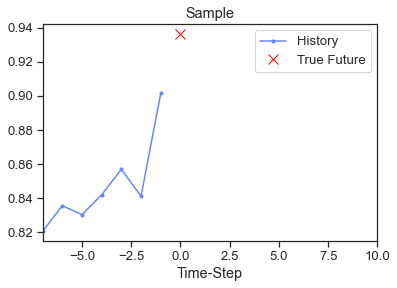

<module 'matplotlib.pyplot' from 'C:\\Users\\KWENEV\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [48]:
# Plotting function

# plot_data: contains labels as list
# delta: 0 => next time step given last "k" steps.
# title: plot title

# Usage: show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

def show_plot(plot_data, future, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go'] # dot-line, red-x, green-o  refer: https://matplotlib.org/3.1.1/api/markers_api.html
    time_steps = create_time_steps(plot_data[0].shape[0]) #calling the utility function
  
    if future:
        ypred = future
    else:
        ypred = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(ypred, plot_data[i], marker[i], markersize=10,label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (ypred+5)*2])
    plt.xlabel('Time-Step')
    plt.show()
    return plt


show_plot([new_x_train[20], new_y_train[20]], 0, 'Sample')

In [49]:
# moving window average function for a random test
def mwa(history):
    return np.mean(history)

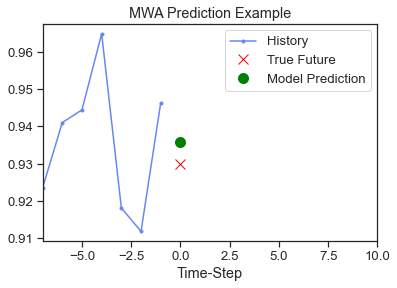

<module 'matplotlib.pyplot' from 'C:\\Users\\KWENEV\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [50]:
# Random check on how the points are being predicted using the "mwa" function given 7 previous observations
i=28
show_plot([new_x_train[i], new_y_train[i], mwa(new_x_train[i])], 0, 'MWA Prediction Example')

## Putting the above logic in a class to fit, transform and forecast time series using trend

In [51]:
class MovingWindowAverage():
    """
    This class creates the data we need for the above problem given any series
    start_index:
    end_index:
    history_size: k => take k values at a time
    target_size: 0 => next value in the time-series
    Output: data: (n,k) and labels (n,1)
    """
    def __init__(self, history_size=7, future_target_index=0, start_index=None, end_index=None):
        self.history_size = history_size
        self.future_target_index = future_target_index
        self.start_index = start_index
        self.end_index = end_index
        
        self.data = []
        self.labels = []
    
    def fit(self, dataset):
        """
        Just checking for all the necessary parameters needed
        dataset: numpy array containing the series
        """
        if self.start_index is None:
            self.start_index = 0
        start_index = self.start_index + self.history_size
        if self.end_index is None:
            self.end_index = len(dataset) - self.future_target_index
        return self 
    
    def transform(self, dataset):
        """
        Transforming the dataset into X and y as needed
        Return ndarray of the constructed X and a 1d array of the corresponding labels
        dataset: numpy ndarray containing the series

        """
        for i in range(self.start_index, self.end_index):
            indices = list(range(i-self.history_size, i))
            # Reshape data from (history_size,) to (history_size, 1)
            self.data.append(np.reshape(dataset[indices], (self.history_size, 1)))
            self.labels.append(dataset[i+self.future_target_index])
        self.data = np.array(self.data)
        self.labels = np.array(self.labels)
        return self.data, self.labels
    
    def forecast(self, historic_points, shift=None):
        """
        Returns the future predicted value in the series given k historical data points
        historic_points: k number of past observations
        shift: nth day in the future to predict. 
        """
        if shift and shift>1:
            try:
                if (len(historic_points) == shift):# or (len(historic_points) < (shift*3)):
                    raise ValueError ("Number of historic points must be > shift*3, forecast without shift instead!")
                else:
                    return np.mean(historic_points[-shift:])
            except ValueError as e:
                return e
            
        #if shift is None or shift==1 or shift==0:
        return np.mean(historic_points)

## Using the custom class to predict the future values given k number of previous observations.

### Prediction using 20 previous observations

RMSE:  0.07968618202034514
R-Squared:  0.9226918110919905


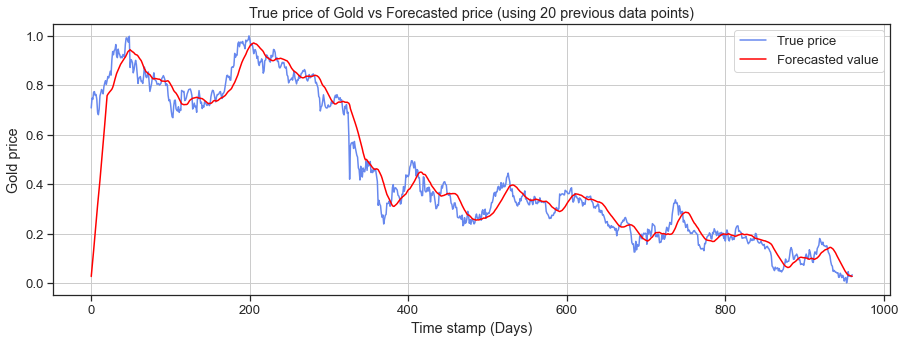

In [52]:
#initializing, fitting and transforming the custom TimeSeriesForecast with the MinMax-Scaled data
sample = MovingWindowAverage(history_size=20)
sample.fit(min_max_scale)

#Transforming the data, making it ready for predictions
data, labels = sample.transform(min_max_scale)

#computing predictions
yhat = []
for hist in data:
    yhat.append(sample.forecast(hist))
    

rmse = mean_squared_error(y_true=labels, y_pred=yhat, squared=False)
r_squared = r2_score(y_true=labels, y_pred=yhat)

#print the Root Mean Square Error (RMSE) and R-squared scores
print('RMSE: ', rmse)
print('R-Squared: ', r_squared)

# Visualizing the predicted results
plt.figure(figsize=(15,5))
plt.plot(labels, label='True price')

plt.plot(yhat, color='r', label='Forecasted value')
plt.title('True price of Gold vs Forecasted price (using 20 previous data points)')
plt.ylabel('Gold price')
plt.xlabel('Time stamp (Days)')
plt.legend()
plt.grid()
plt.show()



### Observation
The forecasted values capture the general trend of the series, which is a good thing.

### Prediction using 7 previous observations

RMSE:  0.04999540285764427
R-Squared:  0.9695687630632499


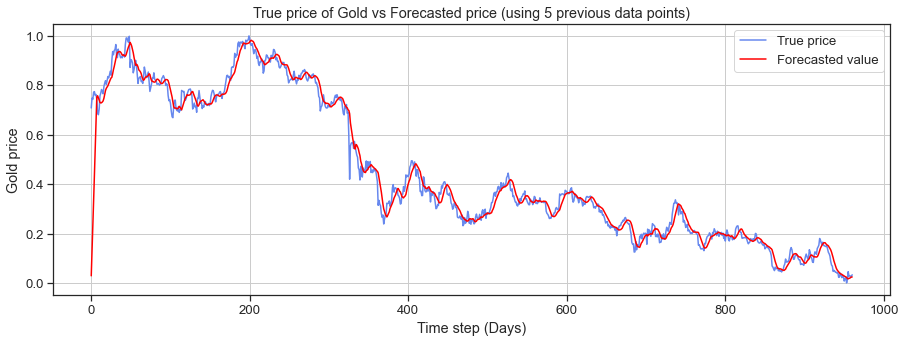

In [53]:
#initializing, fitting and transforming the custom TimeSeriesForecast with the MinMax-Scaled data
five_days = MovingWindowAverage(history_size=7)
five_days.fit(min_max_scale)

five_days_data, true_y = five_days.transform(min_max_scale)

#computing predictions
ypred = []
for hist in five_days_data:
    ypred.append(five_days.forecast(hist))


rmse = mean_squared_error(y_true=true_y, y_pred=ypred, squared=False)
r_squared = r2_score(y_true=true_y, y_pred=ypred)

#print the Root Mean Square Error (RMSE) and R-squared scores
print('RMSE: ', rmse)
print('R-Squared: ', r_squared)
# Visualizing the predicted results
plt.figure(figsize=(15,5))
plt.plot(true_y, label='True price')

plt.plot(ypred, color='r', label='Forecasted value')
plt.title('True price of Gold vs Forecasted price (using 5 previous data points)')
plt.ylabel('Gold price')
plt.xlabel('Time step (Days)')
plt.legend()
plt.grid()
plt.show()


### Observation
Using 5 previous observations to predict for the next available day gives a much better result as seen from the plot, it all gives little better **RMSE** and **R-Squared** scores.

### Predicting for the 20th day into the future using 30 previous observations

RMSE:  0.07968618202034514
R-Squared:  0.9695687630632499


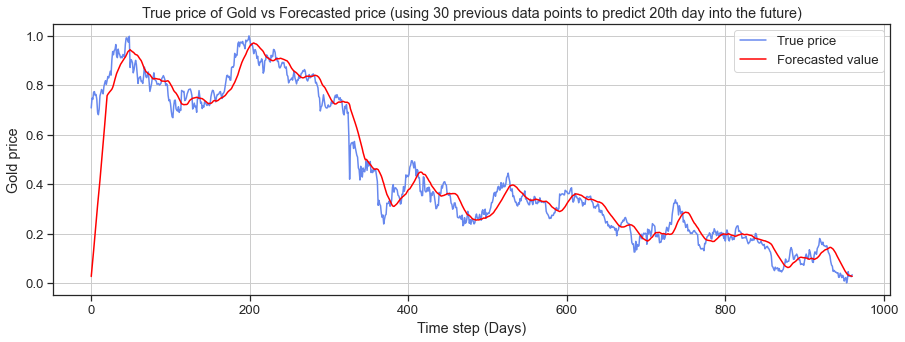

In [54]:
shift = MovingWindowAverage(history_size=30)
shift.fit(min_max_scale)

tt, yy = shift.transform(min_max_scale)

#Forecasting five days into the future gold prices 
pred_5th = []
for points in tt:
    pred_5th.append(shift.forecast(points,20))

#evaluation
rmse = mean_squared_error(y_true=yy, y_pred=pred_5th, squared=False)
r_square = r2_score(y_true=yy, y_pred=pred_5th)

#print the Root Mean Square Error (RMSE) and R-squared scores
print('RMSE: ', rmse)
print('R-Squared: ', r_squared)

# Visualizing the predicted results
plt.figure(figsize=(15,5))
plt.plot(yy, label='True price')

plt.plot(pred_5th, color='r', label='Forecasted value')
plt.title('True price of Gold vs Forecasted price (using 30 previous data points to predict 20th day into the future)')
plt.ylabel('Gold price')
plt.xlabel('Time step (Days)')
plt.legend()
plt.grid()
plt.show()


### Observation
Predicting for 20th day into the future given 30 previous observations also give a good result as seen from the above plot. The **RMSE** and **R-Squared** cores are also good.

## Model Comparison

In [62]:
# constructing the result summary table containing the scores for each model on cross validation and test dataset
task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "RMSE on CV", "RMSE on Test", "R-Square on CV", "R-Square on Test"]
task1_result.add_row(['Linear Reg', 0.626620, 0.504725, 0.993017, 0.98895])
task1_result.add_row(['DT Reg', 1.797057, 0.709967, 0.942570, 0.976840])
task1_result.add_row(['RF Reg', 0.971007, 0.448428, 0.983233, 0.990760])
task1_result.add_row(['Lasso Reg', 4.492464, 6.051782, 0.641088, -0.682793])
task1_result.add_row(['Ridge Reg', 0.629226, 0.511232, 0.992960, 0.987991])
task1_result.add_row(['BayesianRidge', 0.627287, 0.503390, 0.993002, 0.988357])
task1_result.add_row(['GradientBoost', 1.117694, 0.435464, 0.977784, 0.991287])
task1_result.add_row(['SGD Reg', 1.763228, 1.696318, -5.5288e+34, -1.322e+35])
task1_result.add_row(['ARIMA', 1.266, '-', 0.971, '-'])
task1_result.add_row(['MovingWindowAverage:', ' ', ' ', ' ', ' '])
task1_result.add_row(['with 20 recent data points', 0.079686, '-', 0.922692, '-'])
task1_result.add_row(['with 5 recent points', 0.049995, '-', 0.969569, '-'])
task1_result.add_row(['20th day in the future', 0.079686, '-', 0.969569, '-'])
print('Task1: Result summary for ML models:')
print(task1_result)

Task1: Result summary for ML models:
+----------------------------+------------+--------------+----------------+------------------+
|         Regressor          | RMSE on CV | RMSE on Test | R-Square on CV | R-Square on Test |
+----------------------------+------------+--------------+----------------+------------------+
|         Linear Reg         |  0.62662   |   0.504725   |    0.993017    |     0.98895      |
|           DT Reg           |  1.797057  |   0.709967   |    0.94257     |     0.97684      |
|           RF Reg           |  0.971007  |   0.448428   |    0.983233    |     0.99076      |
|         Lasso Reg          |  4.492464  |   6.051782   |    0.641088    |    -0.682793     |
|         Ridge Reg          |  0.629226  |   0.511232   |    0.99296     |     0.987991     |
|       BayesianRidge        |  0.627287  |   0.50339    |    0.993002    |     0.988357     |
|       GradientBoost        |  1.117694  |   0.435464   |    0.977784    |     0.991287     |
|          SG

#### Observation
- It is evident from the above table that, `Lasso Reg`, and `SGDRegressor` performance isn't good (they have negative $R^2$ scores).
- While `Linear Reg`, `DecisionTree Reg`, `RandomForest Reg`, `Ridge Reg`, `BayesianRidge`, and `GradientBoost Reg` all did comparably well on both Cross validation and Test data, we decided to settle with `Linear Regression` as our solution for the problem at hand.

### Retraining the best model

Cross validation scores:
RMSE: 0.6266204530683203
R-Squared: 0.9930172358698773

Test scores:
RMSE: 0.5047247814889094
R-Squared: 0.9882949443759095



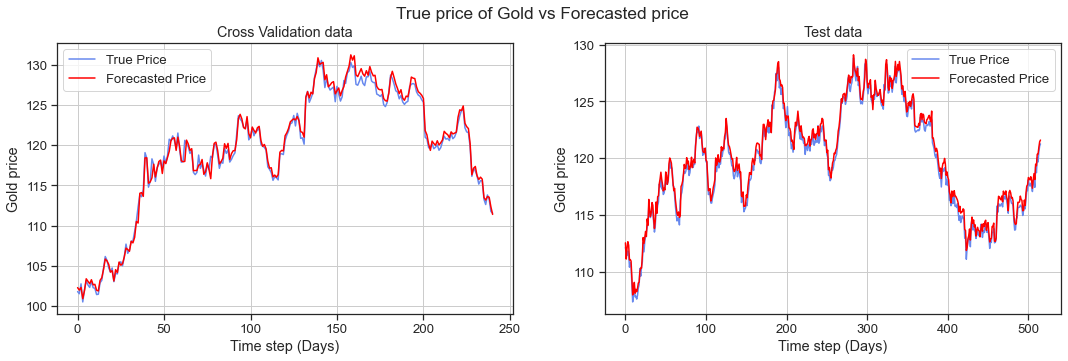

In [63]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Evaluate the model by calling the "evaluate_model" function defined above
print('Cross validation scores:')
print('=='*12)
evaluate_model(linear_reg_model, X_cv[selected_features], y_cv)

print('Test scores:')
print('=='*6)
evaluate_model(linear_reg_model, X_test[selected_features], y_test)

# Visualize the performance on Cross validation data
yhat_cv = linear_reg_model.predict(X_cv[selected_features]) # predict on cross validation data
yhat_test = linear_reg_model.predict(X_test[selected_features]) #predict on test data

#plot the cross validation predictions and the true cv values
fig = plt.figure(figsize=(18,5))
fig.suptitle('True price of Gold vs Forecasted price')
ax1 = fig.add_subplot(121)
ax1.set_title('Cross Validation data')
ax1.plot(y_cv.values, label='True Price')
ax1.plot(yhat_cv, color='r', label='Forecasted Price')
plt.ylabel('Gold price')
plt.xlabel('Time step (Days)')
plt.legend()
plt.grid()

# plot the test predictions and true values
ax2 = fig.add_subplot(122)
ax2.set_title('Test data')
ax2.plot(y_test.values, label='True Price')
ax2.plot(yhat_test, color='r', label='Forecasted Price')
plt.ylabel('Gold price')
plt.xlabel('Time step (Days)')
plt.legend()
plt.grid()
plt.show()

### Persist the final model 

In [64]:
# Saving the model in the current working directory
joblib.dump(linear_reg_model, 'gold_forecast_model.pkl')

['gold_forecast_model.pkl']

In [65]:
# Load the model from disk for prediction
gold_forecast_model = joblib.load('gold_forecast_model.pkl')

# Testing the loaded model on test data
y_predict = gold_forecast_model.predict(X_test[selected_features])

# Evaluating the saved model
RSME_score = mean_squared_error(y_true=y_test, y_pred=y_predict, squared=False) #squared=False will RMSE instead of MSE
R2_score = r2_score(y_test, y_predict)

# print the evaluation scores
print('RMSE:', RSME_score)
print('R-Squared:', R2_score)

RMSE: 0.5047247814889094
R-Squared: 0.9882949443759095


### Conclusion

### Reference:
- Iftikhar ul Sami, Khurum Nazir Junejo,"Predicting Future Gold Rates Using Machine Learning Approach", IJACSA: International Journal of Advanced Computer Science and Applications, Vol. 8, No.12, 2017
- https://www.projectpro.io/article/how-to-build-arima-model-in-python/544#
- https://towardsdatascience.com/save-trained-models-python-22a11376d975
- https://medium.com/analytics-vidhya/save-and-load-your-scikit-learn-models-in-a-minute-21c91a961e9b
- https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b